In [1]:
##Pythonで株価のデータ分析｜株価分析を通してPythonでのデータ分析を学びましょう
##https://www.youtube.com/watch?v=0-fZ47QudYo

#Pandas DataReaderをインストール
!pip install pandas_datareader

In [2]:
#必要なパッケージをインポート
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

#ワーニング抑止
%matplotlib inline
# pd.core.common.is_list_like = pd.api.types.is_list_like

In [3]:
#個別銘柄を取得(リクルートホールディングス 6098.JP)
df = data.DataReader('6098.JP', 'stooq')


In [4]:
#取得データを確認
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-23,3898.0,3925.0,3810.0,3864.0,4235400
2020-06-22,3825.0,3876.0,3810.0,3836.0,2359900
2020-06-19,3884.0,3911.0,3800.0,3800.0,5619800
2020-06-18,3801.0,3875.0,3790.0,3852.0,4201500
2020-06-17,3822.0,3859.0,3778.0,3821.0,3885000


In [5]:
#一番古いデータ
df.index.min()

Timestamp('2015-06-26 00:00:00')

In [6]:
#一番新しいデータ
df.index.max()

Timestamp('2020-06-23 00:00:00')

In [7]:
##降順データを昇順に並び替え
#INDEXでソートする（値でソートするならsort_values()）
df = df.sort_index()
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2015-06-26,1236.60,1239.88,1223.51,1234.97,2745004
2015-06-29,1189.11,1210.40,1187.46,1200.57,3825666
2015-06-30,1205.49,1225.14,1202.21,1223.51,5825197
2015-07-01,1221.85,1238.24,1213.67,1238.24,2278548
2015-07-02,1243.16,1243.16,1225.14,1228.41,1900317
2015-07-03,1213.67,1238.24,1208.76,1234.97,1918938
2015-07-06,1213.67,1241.51,1210.40,1238.24,3679747
2015-07-07,1241.51,1256.26,1231.69,1251.34,4368439
2015-07-08,1238.24,1241.51,1210.40,1213.67,4398356


In [8]:
##条件指定
df.index>='2019-06-01 00:00:00'

array([False, False, False, ...,  True,  True,  True])

In [9]:
#条件に合うものだけを抽出(2019/6/1 〜 2020/4/30)
#df[df.index>='2019-06-01 00:00:00']
#df[df.index<='2020-05-01 00:00:00']
df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-05-01 00:00:00')]

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3412.41,3463.92,3394.58,3463.92,3484466
2019-06-04,3456.00,3456.00,3259.86,3263.82,7004164
2019-06-05,3320.28,3393.58,3309.39,3393.58,5062595
2019-06-06,3364.87,3381.70,3330.20,3339.11,4983547
2019-06-07,3371.79,3381.70,3318.30,3342.08,2580413
...,...,...,...,...,...
2020-04-24,2730.00,2765.00,2700.50,2764.00,5509400
2020-04-27,2810.00,2950.00,2787.50,2937.50,7598200
2020-04-28,2990.00,2997.50,2897.50,2952.00,5592300


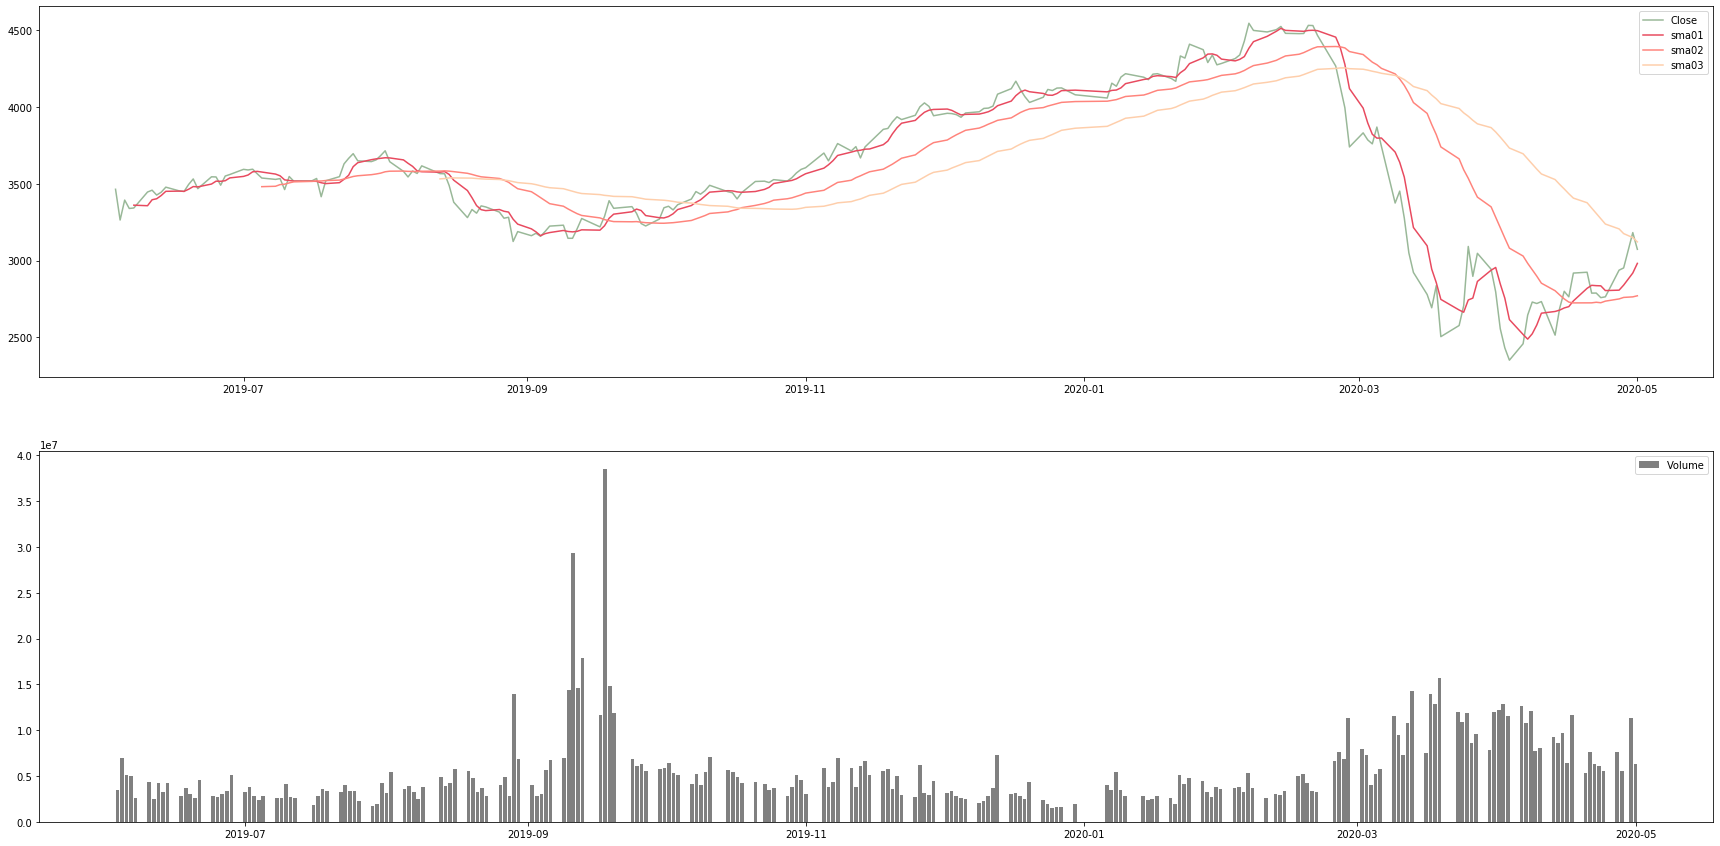

In [10]:
## リクルートホールディングスのグラフを書いてみる
df = df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-05-01 00:00:00')]
date = df.index
price= df['Close']

#移動平均取得
span01=5
span02=25
span03=50
df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))

#株価
plt.subplot(2,1,1)   # 縦分割数, 横分割数, 配置位置
plt.plot(date, price, label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
plt.plot(date,df['sma03'], label='sma03', color='#feceab')
plt.legend()

#出来高
plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()


In [ ]:
## ファーストリテイリング
start = '2019-06-01'
end = '2020-05-01'
company_code = '6502.JP'

##グラフを描画
#データ取得して範囲を絞り込む
df = data.DataReader(company_code, 'stooq')
df = df[(df.index>=start) & (df.index<=end)]

#X軸、Y軸のデータを抽出
date = df.index
price= df['Close']

#移動平均取得
span01=5
span02=25
span03=50
df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

#グラフの大きさを指定
plt.figure(figsize=(30,15))

#株価グラフ
plt.subplot(2,1,1)   # 縦分割数, 横分割数, 配置位置
plt.plot(date, price, label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
plt.plot(date,df['sma03'], label='sma03', color='#feceab')
plt.legend()

#出来高グラフ
plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [11]:
##関数にする
def company_stock(start, end, company_code):
    #範囲を指定してデータ取得
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]

    #X軸、Y軸のデータを抽出
    date = df.index
    price= df['Close']

    #移動平均取得
    span01=5
    span02=25
    span03=50
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()

    #グラフの大きさを指定
    plt.figure(figsize=(20,10))

    #株価グラフ
    plt.subplot(2,1,1)   # 縦分割数, 横分割数, 配置位置
    plt.plot(date, price, label='Close', color='#99b898')
    plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
    plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
    plt.plot(date,df['sma03'], label='sma03', color='#feceab')
    plt.legend()

    #出来高グラフ
    plt.subplot(2,1,2)
    plt.bar(date, df['Volume'], label='Volume', color='grey')
    plt.legend()

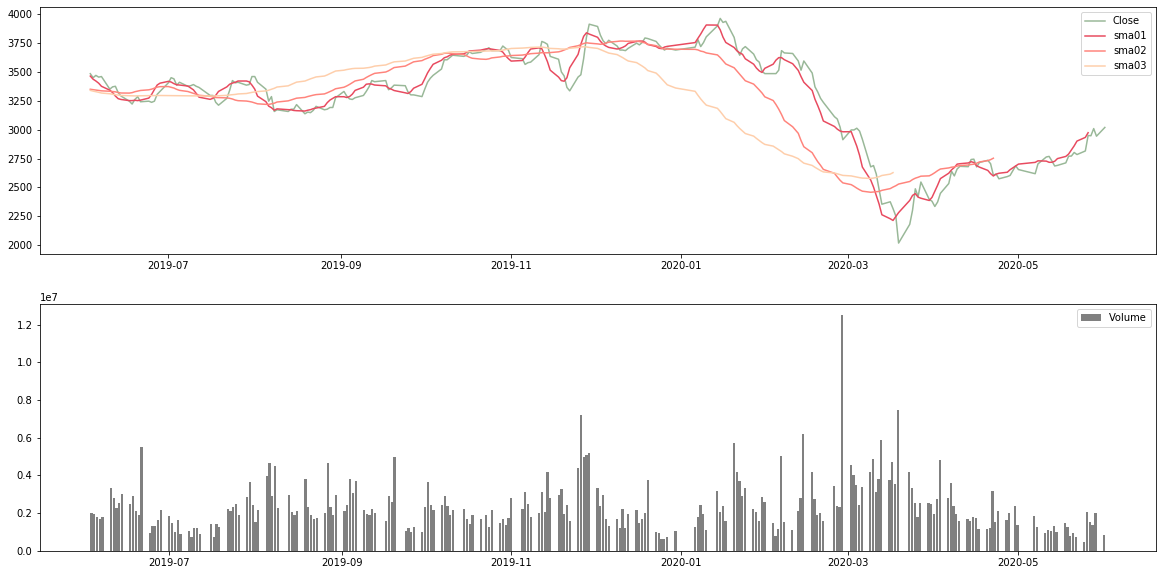

In [12]:
company_stock('2019-06-01', '2020-06-01', '6502.JP')

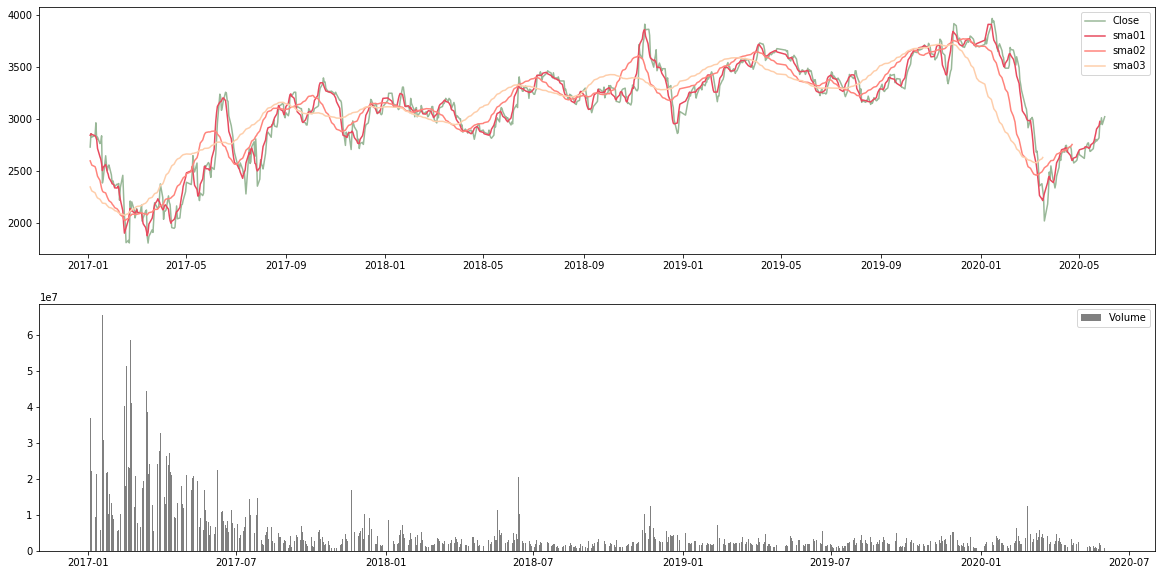

In [14]:
company_stock('2017-01-01', '2020-06-01', '6502.JP')

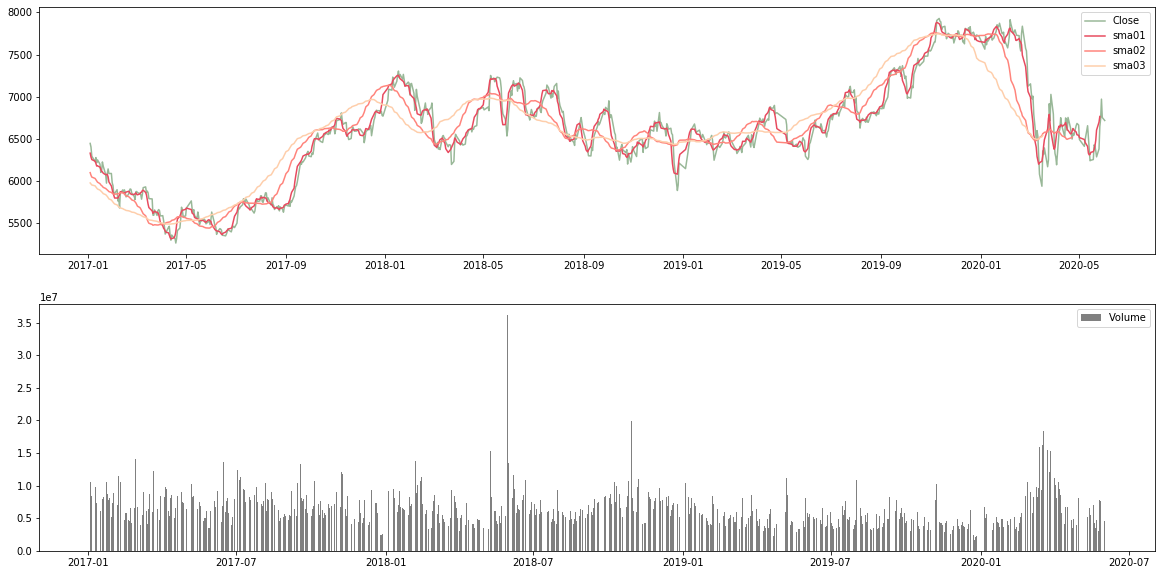

In [15]:
company_stock('2017-01-01', '2020-06-01', '7203.JP')